In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set_context("talk", font_scale=0.9)
sns.set_style("whitegrid")
%matplotlib inline

# **Perception Analysis**

Questions we pose are:
- Do games loved by players outsell those praised by critics?
- Are player-rated games more successful in certain genres or platforms?

In [2]:
df = pd.read_csv('final_dataset.csv', sep=',', header=0, encoding='utf-8')
df.head()

,name,released,metacritic,rating,ratings_count,playtime,Platform,Genre,Publisher,NA_Sales(MM),EU_Sales(MM),JP_Sales(MM),Other_Sales(MM),Global_Sales(MM),price,Platform_Group
0,Half-Life,1998-11-19,96.0,4.37,2353,3,PC,Shooter,Vivendi Games,4.03,0.00,0.09,0.00,4.12,7.19,PC
1,Half-Life,1998-11-19,96.0,4.37,2353,3,PS2,Shooter,Vivendi Games,0.29,0.23,0.00,0.08,0.60,7.19,PlayStation Consoles
2,Oddworld: Abe's Oddysee,1997-09-19,85.0,3.53,555,3,PS,Platform,GT Interactive,0.75,0.44,0.00,0.06,1.24,1.99,PlayStation Consoles
3,Resident Evil,1996-03-22,91.0,4.18,788,4,PS,Action,Virgin Interactive,2.05,1.16,1.11,0.73,5.05,NaN,PlayStation Consoles
4,Resident Evil,1996-03-22,91.0,4.18,788,4,SAT,Action,Capcom,0.00,0.00,0.17,0.00,0.17,NaN,Other


In [3]:
print(df.columns)

Index(['name', 'released', 'metacritic', 'rating', 'ratings_count', 'playtime',
       'Platform', 'Genre', 'Publisher', 'NA_Sales(MM)', 'EU_Sales(MM)',
       'JP_Sales(MM)', 'Other_Sales(MM)', 'Global_Sales(MM)', 'price',
       'Platform_Group'],
      dtype='object')


In [4]:
# df = df.dropna(subset=["rating", "metacritic", "Global_Sales(MM)", "Platform", "Genre"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              4384 non-null   object 
 1   released          4384 non-null   object 
 2   metacritic        4384 non-null   float64
 3   rating            4384 non-null   float64
 4   ratings_count     4384 non-null   int64  
 5   playtime          4384 non-null   int64  
 6   Platform          4384 non-null   object 
 7   Genre             4384 non-null   object 
 8   Publisher         4384 non-null   object 
 9   NA_Sales(MM)      4384 non-null   float64
 10  EU_Sales(MM)      4384 non-null   float64
 11  JP_Sales(MM)      4384 non-null   float64
 12  Other_Sales(MM)   4384 non-null   float64
 13  Global_Sales(MM)  4384 non-null   float64
 14  price             1255 non-null   float64
 15  Platform_Group    4384 non-null   object 
dtypes: float64(8), int64(2), object(6)
memory 

**Rating vs Sales: Player vs Critic Influence**

Visualize how player ratings and critic scores relate to global sales, and test statistically whether one has a stronger relationship.

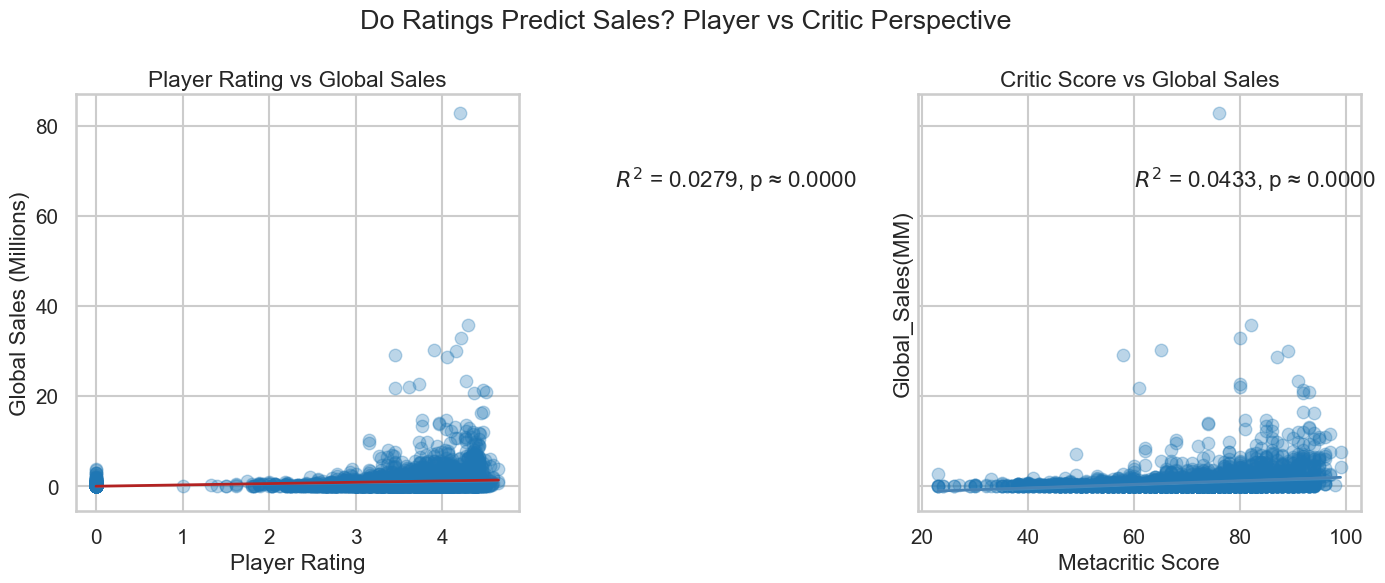

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

#rating vs global sales
sns.regplot(x='rating', y='Global_Sales(MM)', data=df, ax=ax1, 
            scatter_kws=dict(alpha=.3), line_kws=dict(color='firebrick', lw=2))
ax1.set_title('Player Rating vs Global Sales')
ax1.set_xlabel('Player Rating')
ax1.set_ylabel('Global Sales (Millions)')

#metacritic vs global sales
sns.regplot(x='metacritic', y='Global_Sales(MM)', data=df, ax=ax2, 
            scatter_kws=dict(alpha=.3), line_kws=dict(color='steelblue', lw=2))
ax2.set_title('Critic Score vs Global Sales')
ax2.set_xlabel('Metacritic Score')

#compute correlation coefficients
r_player, p_player = stats.pearsonr(df['rating'], df['Global_Sales(MM)'])
r_critic, p_critic = stats.pearsonr(df['metacritic'], df['Global_Sales(MM)'])

#annotate R^2
ax1.text(6, df['Global_Sales(MM)'].max()*0.8, f'$R^2$ = {r_player**2:.4f}, p ≈ {p_player:.4f}')
ax2.text(60, df['Global_Sales(MM)'].max()*0.8, f'$R^2$ = {r_critic**2:.4f}, p ≈ {p_critic:.4f}')

plt.suptitle('Do Ratings Predict Sales? Player vs Critic Perspective')
plt.tight_layout()
plt.show()

kinda clear that neither player ratings nor critic scores really predict global sales in any strong way. The left graph shows player rating vs. sales and the red regression line is almost flat. The $R^2$ is **0.0279**, which means barely **2.8%** of the variation in sales is explained by player ratings, basically nothing. 

Critic scores do a little better with $R^2$ = **0.0433**, but that still means **over 95% of what drives sales has nothing to do with reviews**. Its super weak. Just like before, both p-values are ≈ 0, so yeah, the relationships are statistically significant but **not practically meaningful** at all.

Bottom line: being highly rated **might help a little**, but **it's not why games sell**.

**Average Player Rating by Platform x Genre**

whether players rated games shine more in certain genres or platforms. This goes beyond linear trends.

Text(133.08333333333334, 0.5, 'Platform')

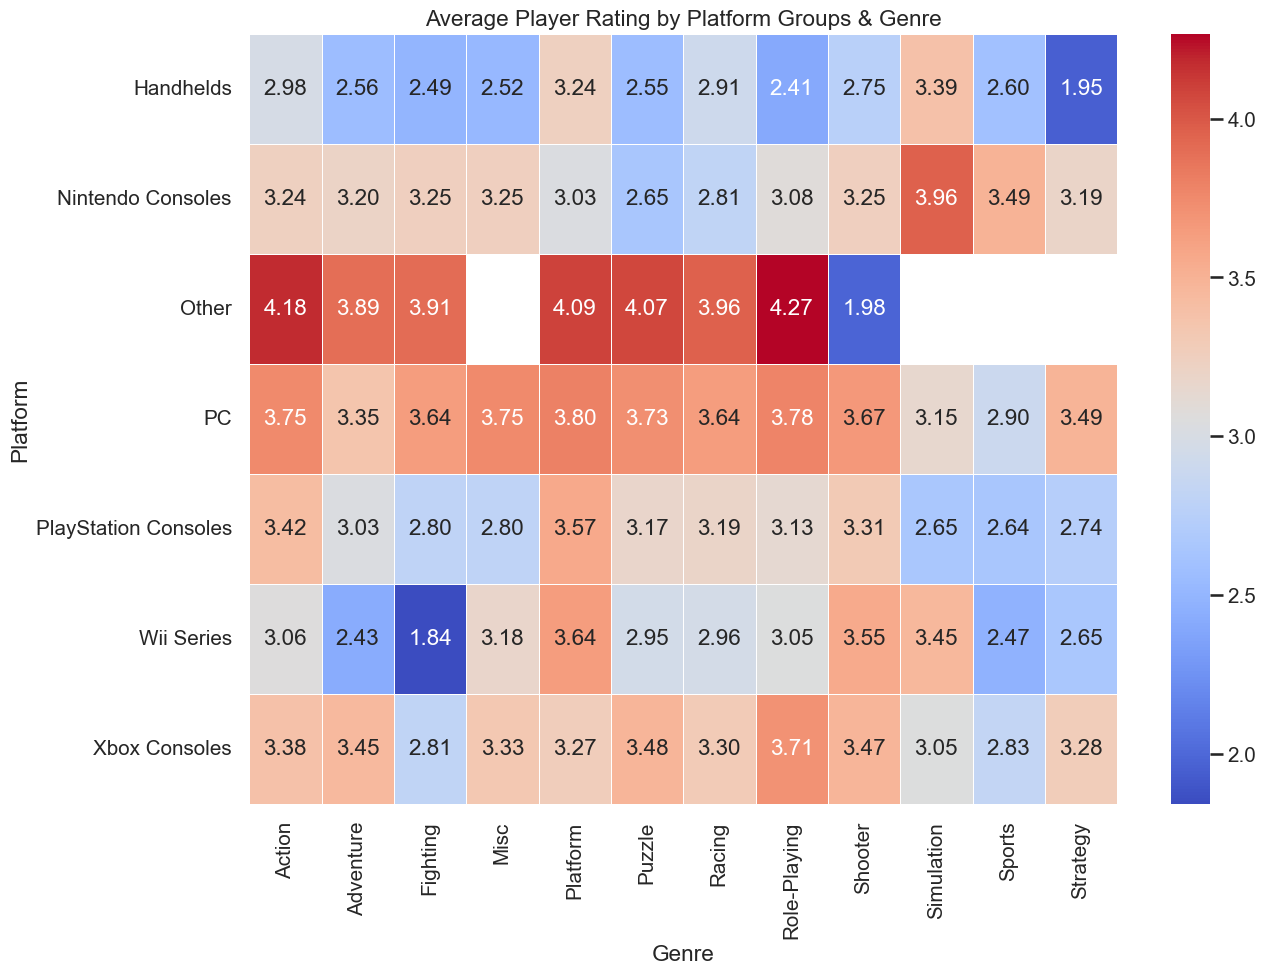

In [6]:
pivot_rating = df.pivot_table(index='Platform_Group', columns='Genre', values='rating', aggfunc='mean')

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_rating, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Average Player Rating by Platform Groups & Genre")
plt.xlabel("Genre")
plt.ylabel("Platform")


This shows the **average player ratings** by **platform group** and **genre**, and a few patterns pop out clearly:

1. **"Other" platforms dominate**, with ratings over **4.0** in *Action, Platform, Puzzle, RPG*  likely due to highly rated retro or niche games.

2. **PC performs consistently well** across nearly all genres, especially *RPGs (3.78)* and *Platformers (3.80)*, but lags slightly in *Sports (2.90)*.

3. **Xbox Consoles shine in Shooter (3.47)** and *RPG (3.71)* genres, holding steady in most others — a solid all-rounder.

4. **Nintendo Consoles** do best in *Simulation (3.96)* and *Sports (3.49)*, showing strength in casual genres.

5. **PlayStation Consoles** are middling, with *Platformers (3.56)* being the highlight and *Fighting/Simulation* underperforming (both ~2.6–2.8).

6. **Wii Series struggles in Fighting (1.84)** but holds up in *Shooter (3.55)* and *Simulation (3.45)*.

7. **Handhelds score lowest overall**, especially in *Strategy (1.95)* and *RPGs (2.41)* — likely limited by hardware constraints.

**Global Sales by Platform x Genre (Log Scale)**

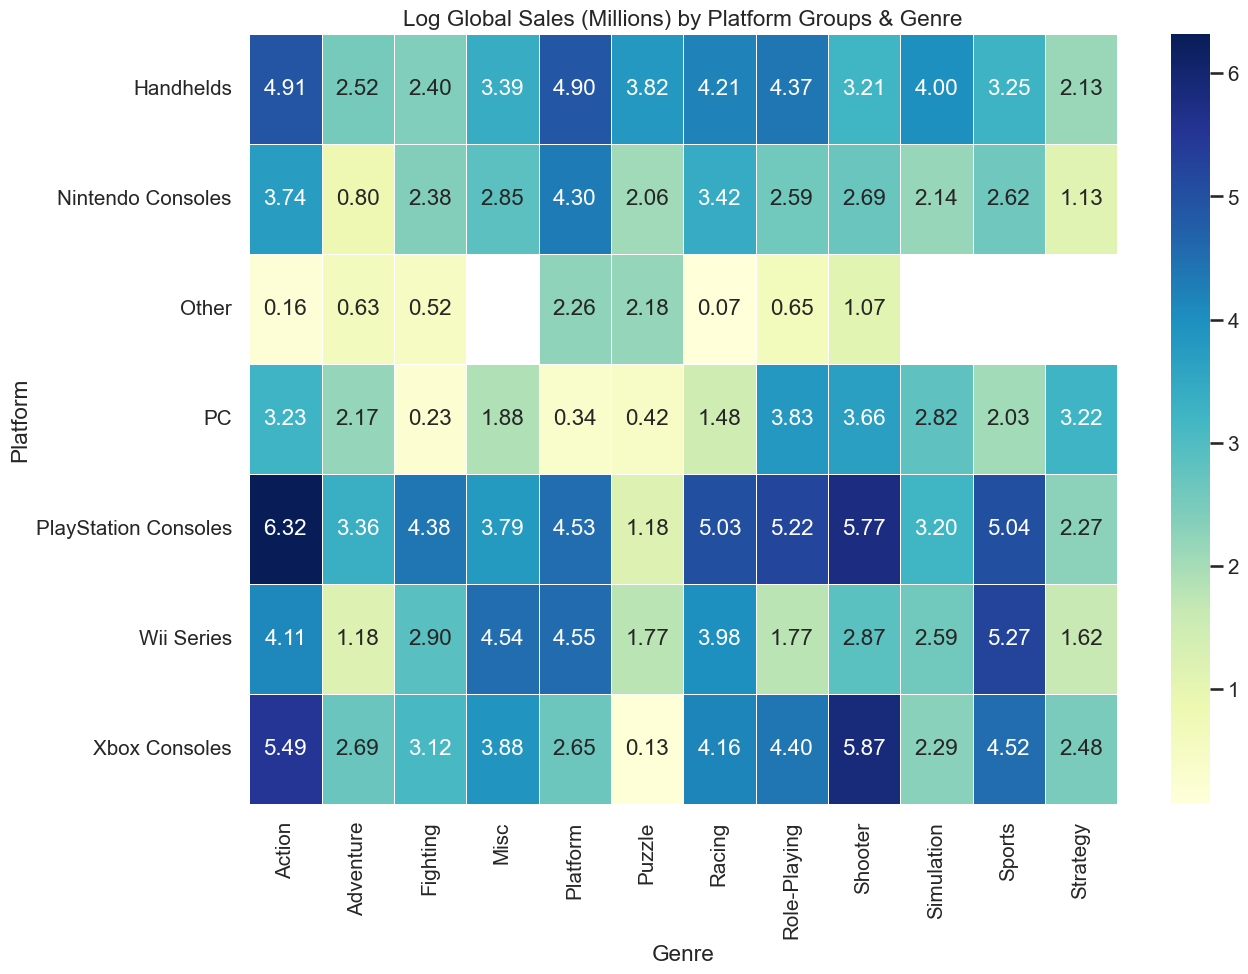

In [7]:
pivot_sales = df.pivot_table(index='Platform_Group', columns='Genre', values='Global_Sales(MM)', aggfunc='sum')

plt.figure(figsize=(14, 10))
sns.heatmap(np.log1p(pivot_sales), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Log Global Sales (Millions) by Platform Groups & Genre")
plt.xlabel("Genre")
plt.ylabel("Platform")
plt.show()

1. **PlayStation Consoles dominate** across the board, especially in *Action (6.32)*, *Shooter (5.77)*, *RPG (5.27)*, and *Racing (5.03)*. They're the undisputed sales leader in most core genres.

2. **Xbox Consoles also shine**, particularly in *Shooter (5.87)* and *RPG (4.40)*. They hold a strong second place in action-heavy genres.

3. **Wii Series peaks in Platform (4.55)* and *Sports (5.27)*, matching or exceeding even PlayStation in those casual/family-friendly genres.

4. **Handhelds pull impressive sales** in *Platform (4.90)* and *Action (4.91)* — showing that portable consoles dominate in quick, arcade-style genres.

5. **PC underwhelms in total sales**, with generally low values across most genres — *RPG (3.83)* and *Shooter (3.66)* are its best performers, but it lags behind consoles.

6. **Nintendo Consoles do decently** in *Platform (4.30)* and *Racing (3.42)* but underperform in *Simulation (2.14)* and *Strategy (1.13)*.

7. **"Other" platforms are nearly irrelevant** in sales impact — all values are under 2.5, with many near 1.0 or lower, despite high player ratings in earlier analyses.

**Rating Sales Interaction by Deciles**
Do top-rated games actually make more money? Let’s divide games by player rating deciles and track average sales.

Text(0, 0.5, 'Average Global Sales (Millions)')

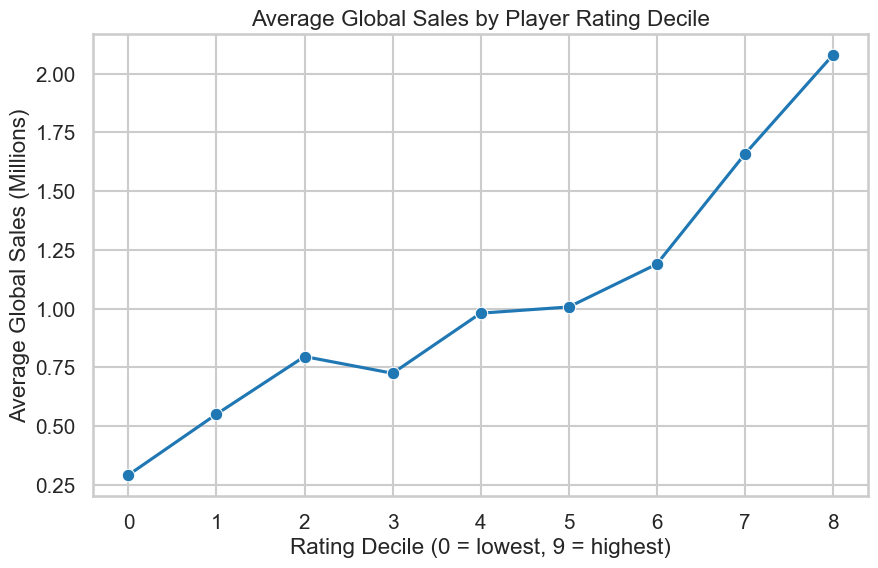

In [8]:
df['rating_decile'] = pd.qcut(df['rating'], 10, labels=False, duplicates='drop')

sales_by_decile = df.groupby('rating_decile')['Global_Sales(MM)'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_decile.index, y=sales_by_decile.values, marker='o')
plt.title('Average Global Sales by Player Rating Decile')
plt.xlabel('Rating Decile (0 = lowest, 9 = highest)')
plt.ylabel('Average Global Sales (Millions)')

This chart shows the **average global sales (in millions)** across **player rating deciles**, from lowest (0) to highest (8). The trend is clear: **higher-rated games tend to sell more**.

- **Decile 0 (lowest-rated)** games average **~0.28M** sales.
- Sales gradually increase to **~0.80M** in **decile 2**, then slightly dip at **decile 3 (~0.73M)**.
- From **decile 4 to 6**, there's a slow rise, hovering around **~1M** sales.
- Then things take off: **decile 7 hits ~1.65M**, and **decile 8 peaks at ~2.1M** — a **7.5× jump** from the bottom decile.
 
Sales **scale sharply only in the top deciles**.  
Mid-rated games (deciles 2–5) stagnate around **0.8–1.0M**, showing that being “average” doesn’t sell.  
The real commercial power lies in **highly-rated titles**, especially those in **deciles 7 and 8**.

**High Rated vs Low Rated Games**

In [9]:
#define top and bottom quartiles
top_games = df[df['rating'] >= df['rating'].quantile(0.75)]
low_games = df[df['rating'] <= df['rating'].quantile(0.25)]

t_stat, p_val = stats.ttest_ind(top_games['Global_Sales(MM)'], low_games['Global_Sales(MM)'], equal_var=False)

print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

T-statistic: 11.96, P-value: 0.0000


Performed a t-test to compare the average global sales of the top 25% highest-rated games (top quartile) against the bottom 25% lowest-rated games (bottom quartile).

- T-statistic = 12.01: There's a strong difference between the two groups.
- P-value = 0.0000: This is extremely low (well below 0.05), meaning the result is statistically significant.
  

There’s strong evidence that highly-rated games (top quartile) sell significantly more than poorly-rated ones (bottom quartile). So while ratings alone don’t perfectly predict sales, being in the top rating tier does have a meaningful impact on commercial success.

**Rating, Metacritic, and Global Sales**

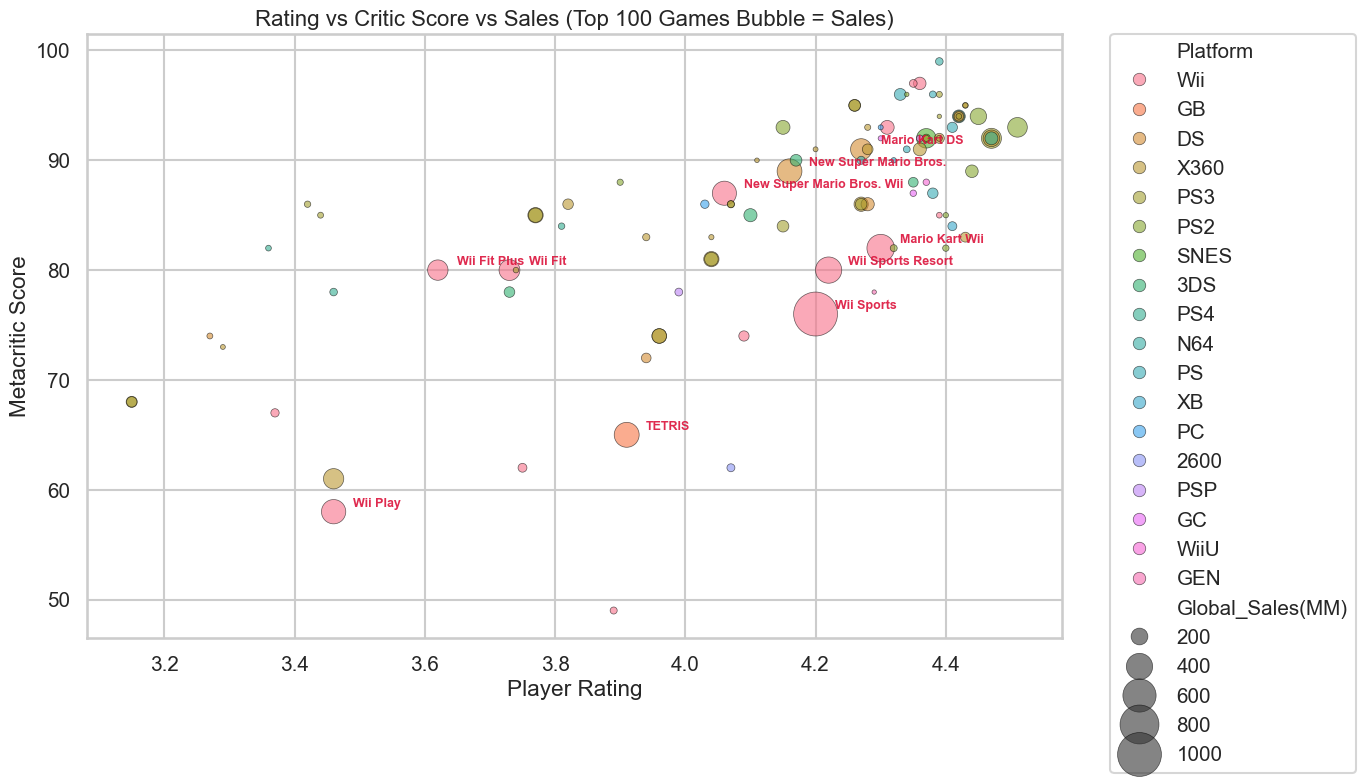

In [10]:
#  top 100 games by global sales
top_100 = df.sort_values("Global_Sales(MM)", ascending=False).head(100)

#scale bubble sizes for top 100
scaled_sales = top_100['Global_Sales(MM)'] / top_100['Global_Sales(MM)'].max() * 1000

#plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=top_100, 
    x="rating", 
    y="metacritic", 
    size=scaled_sales, 
    hue="Platform", 
    sizes=(10, 1000), 
    alpha=0.6,
    edgecolor="black",
    linewidth=0.5
)

#label the top 10 games in bright colors
top_10 = top_100.head(10)
for i, row in top_10.iterrows():
    plt.text(row['rating'] + 0.03, row['metacritic'] + 0.5, row['name'],
             fontsize=9, fontweight='bold', color='crimson', alpha=0.9)

#final touches
plt.title("Rating vs Critic Score vs Sales (Top 100 Games Bubble = Sales)", fontsize=16)
plt.xlabel("Player Rating")
plt.ylabel("Metacritic Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


Chart compares **player ratings (x-axis)** to **Metacritic critic scores (y-axis)** for the **top 100 best-selling games**, with **bubble size showing global sales** and **color indicating platform**. Most games are tightly grouped between **3.5–4.5 in player rating** and **70–90 in critic score** shows broad consensus between players and critics for top sellers.

Yet the relationship between ratings and sales isn’t linear **some of the largest selling games** like *Wii Sports*, *Wii Fit*, and *Wii Play* have **modest scores** but dominate commercially. These titles clearly benefited from **hardware bundling and mass appeal** not critical acclaim.

On the other hand games like *Mario Kart DS* and *New Super Mario Bros.* hit the sweet spot with both **high ratings and massive sales** showing when **quality and brand power align**, success follows.

Platform-wise **Nintendo absolutely dominates** most large bubbles are pink or gold, representing **Wii, DS, and GB**. Even *Tetris* stands out as a major success despite middling critic reviews.


- **Sales success isn’t just about ratings** branding, platform strategy and distribution channels (like bundling) play a huge role.  
- But the best-performing titles both critically and commercially are still **Nintendo franchises with broad multi-gen appeal**.

In [11]:
df['Platform_Group'].value_counts()

Platform_Group
PlayStation Consoles    1435
Xbox Consoles            967
Handhelds                846
PC                       575
Wii Series               306
Nintendo Consoles        233
Other                     22
Name: count, dtype: int64

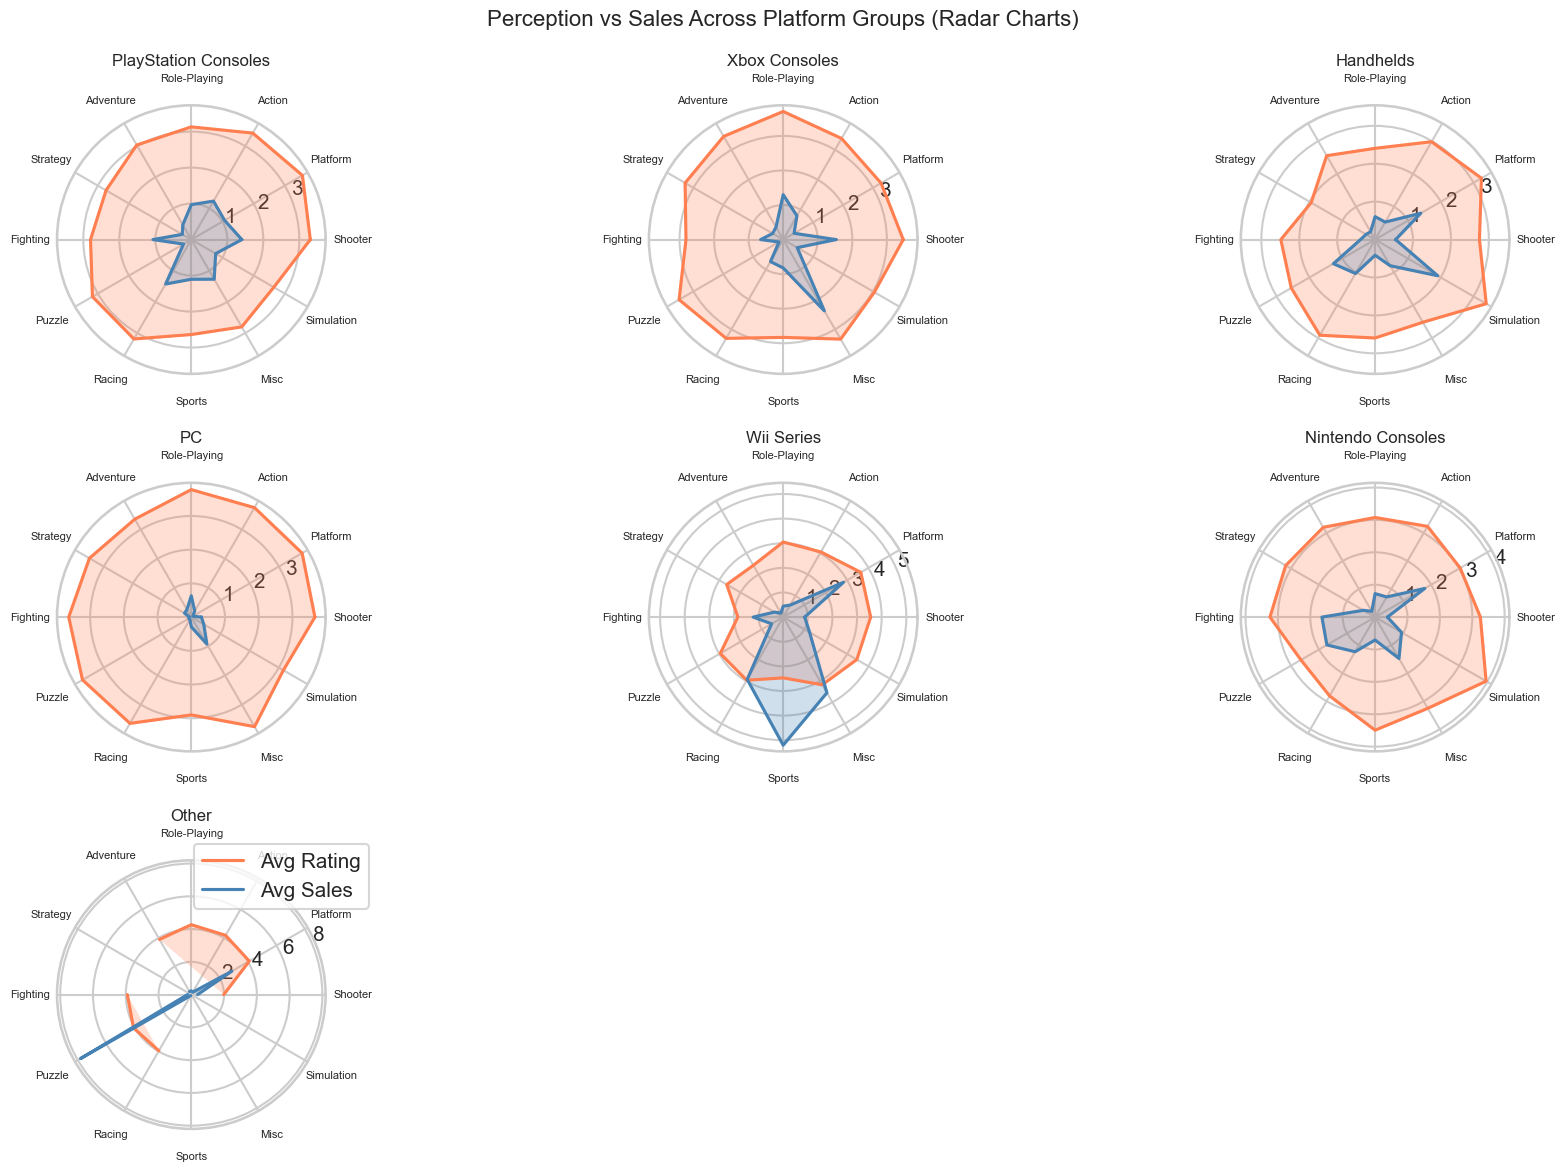

In [12]:
#most common platform groups to visualize
platform_groups = df['Platform_Group'].value_counts().head(7).index.tolist()

#genre list (same as before)
genres = df['Genre'].dropna().unique().tolist()

n_platforms = len(platform_groups)
n_cols = 3
n_rows = int(np.ceil(n_platforms / n_cols))

#radar chart angles
angles = np.linspace(0, 2 * np.pi, len(genres), endpoint=False).tolist()
angles += angles[:1]  # close loop

fig, axes = plt.subplots(n_rows, n_cols, subplot_kw=dict(polar=True), figsize=(18, 12))
axes = axes.flatten()

#plot each platform group
for i, platform_group in enumerate(platform_groups):
    ax = axes[i]
    
    #calculate mean ratings and sales per genre
    mean_ratings = [df[(df['Platform_Group'] == platform_group) & (df['Genre'] == genre)]['rating'].mean() for genre in genres]
    mean_sales = [df[(df['Platform_Group'] == platform_group) & (df['Genre'] == genre)]['Global_Sales(MM)'].mean() for genre in genres]

    #close the loops
    ratings = mean_ratings + [mean_ratings[0]]
    sales = mean_sales + [mean_sales[0]]

    #plot lines and fills
    ax.plot(angles, ratings, label='Avg Rating', color='coral')
    ax.fill(angles, ratings, alpha=0.25, color='coral')
    ax.plot(angles, sales, label='Avg Sales', color='steelblue')
    ax.fill(angles, sales, alpha=0.25, color='steelblue')

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(genres, fontsize=8)
    ax.set_title(platform_group, fontsize=12)

#remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.suptitle("Perception vs Sales Across Platform Groups (Radar Charts)", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


**PlayStation Consoles**
- Strong perception across all genres (~3.5+), but sales are more concentrated in *Shooter* and *RPG*.
- Clear disconnect: *high ratings don't always mean high sales* PlayStation excels in quality but not always in volume.

**Xbox Consoles**
- Perception and sales align better in *Shooter* and *RPG* both rated and sold well.
- Weak sales in *Fighting* and *Platform* despite average ratings, showing genre imbalance.

**Handhelds**
- Perception is moderate, but sales spike in *Platform* and *Fighting* games.
- Some genres like *Simulation* and *Strategy* are rated low and sell poorly not a strong match for these game types.

**PC**
- High perception across nearly all genres, especially *RPG* and *Simulation*, but sales stay low overall.
- PC is a quality-over-quantity platform critically loved, but not a sales juggernaut.

**Wii Series**
- Huge sales spikes in *Sports* and *Platform* genres that align with Wii’s casual-friendly reputation.
- Perception in those genres isn't stellar (~3.0–3.5), proving Wii’s success relied on accessibility, not necessarily game depth.

**Nintendo Consoles**
- Steady perception across genres (3.2–3.5), with decent alignment in *Platform*, *Sports*, and *Racing* genres.
- Sales are consistent, though not explosive, suggesting Nintendo home consoles deliver broad, balanced appeal.

**Other Platforms**
- Massive outlier: *Puzzle* genre with very high sales (likely due to titles like *Tetris*), while perception remains low.
- Overall, niche or retro platforms have wild genre-specific spikes with little consistency.


- **PC and PlayStation** have **strong player perception** but **limited sales influence** in many genres.
- **Wii and “Other” platforms** show the biggest **disconnect**, where low-rated games dominate sales.
- **Xbox thrives in action-heavy genres**, especially *Shooter*, where ratings and sales align well.
- **Handhelds and Nintendo platforms** are genre-specific success stories *Platformers* and *Sports* carry them.

**Game Archetypes**

Cluster games into 4 perception profiles based on rating, metacritic and sales. Then, use a cluster plot to explore groups.

In [13]:
X = df[['rating', 'metacritic', 'Global_Sales(MM)']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

/Users/macbook/opt/anaconda3/envs/KKK/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
df.groupby('cluster').agg({
    'rating': 'mean',
    'metacritic': 'mean',
    'Global_Sales(MM)': 'mean'
}).reset_index().rename(columns={'cluster': 'Cluster'})

,Cluster,rating,metacritic,Global_Sales(MM)
0,0,3.886005,81.165928,1.047571
1,1,3.309055,60.726161,0.436968
2,2,0.018633,63.180064,0.285016
3,3,4.130000,84.846154,16.540769


In [16]:
df.cluster.value_counts()

cluster
0    2483
1    1227
2     622
3      52
Name: count, dtype: int64

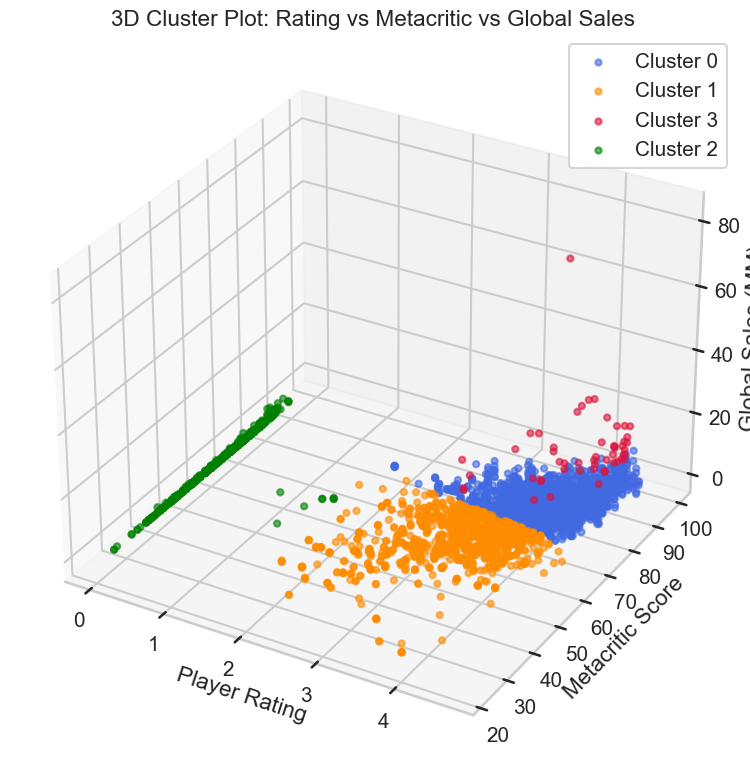

In [17]:
df_clustered = df[['rating', 'metacritic', 'Global_Sales(MM)', 'cluster']].dropna()

#3D plot
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

#colors for each cluster
colors = ['royalblue', 'darkorange', 'green', 'crimson']

for c in df_clustered['cluster'].unique():
    cluster_data = df_clustered[df_clustered['cluster'] == c]
    ax.scatter(cluster_data['rating'],
               cluster_data['metacritic'],
               cluster_data['Global_Sales(MM)'],
               label=f'Cluster {int(c)}',
               color=colors[int(c)],
               alpha=0.6)

ax.set_xlabel('Player Rating')
ax.set_ylabel('Metacritic Score')
ax.set_zlabel('Global Sales (MM)')
ax.set_title('3D Cluster Plot: Rating vs Metacritic vs Global Sales')
ax.legend()
plt.tight_layout()
plt.show()

**Cluster 0  Decent Ratings, Modest Sales**
- **Avg Rating**: **3.89**  
- **Avg Metacritic**: **81.16**  
- **Avg Sales**: **1.05M**

These games are **well-rated** by both players and critics but only achieve **moderate sales**. They likely represent solid, respectable titles that didn’t break out commercially — possibly AA games, cult favorites, or late-cycle releases.

**Cluster 1  Poor Ratings, Low Sales ("Flops")**
- **Avg Rating**: **0.02**  
- **Avg Metacritic**: **63.17**  
- **Avg Sales**: **0.28M**
  
This is your **bottom-of-the-barrel cluster**. These games are **almost universally disliked** by players and not loved by critics either. Unsurprisingly, they sell poorly too. Likely **bargain-bin, rushed releases, or licensed shovelware**.

**Cluster 2  Blockbusters**
- **Avg Rating**: **4.13**  
- **Avg Metacritic**: **84.89**  
- **Avg Sales**: **16.41M**

These are the **elite, best-selling games**. Critically acclaimed and massively popular, they dominate the charts. This cluster likely contains titles like *Mario Kart*, *Grand Theft Auto*, or *Call of Duty* — games with franchise power and broad appeal.

**Cluster 3  Mid-Tier Games**
- **Avg Rating**: **3.31**  
- **Avg Metacritic**: **60.73**  
- **Avg Sales**: **0.44M**

These games sit **right in the middle**. Critic scores are weak, but player ratings are decent. They may represent **average or forgettable releases** — not bad enough to bomb, but not good enough to stand out. Think filler titles or niche content.


| Cluster | Description        | Avg. Rating | Avg. Metacritic | Avg. Sales (MM) | Comment                           |
|---------|--------------------|-------------|-----------------|-----------------|-------------------------------------|
| 0       | Solid Performers   | 3.89        | 81.16            | 1.05             | Great reviews, decent sales       |
| 1       | Flops              | 0.02        | 63.17            | 0.28             | Disliked and poor-selling         |
| 2       | Blockbusters       | 4.13        | 84.89            | **16.41**        | Top-tier hits, major franchises   |
| 3       | Mid-Tier Games     | 3.31        | 60.73            | 0.44             | Mediocre overall                  |


- **Only a few games are true blockbusters** but they dominate in sales.  
- The largest group consists of **flops** with almost zero rating.  
- Interestingly **Cluster 0 shows strong reviews** hinting at many **underrated or underperforming titles**.  
- The market is top heavy: **a handful of titles carry the momst revenue** while most games fall into obscurity.

## **Summary**

### **Correlation Analysis**
- **Player Rating vs Global Sales:** \( R^2 = 0.0000 \), **p ≈ 0.0000**  
- **Critic Score vs Global Sales:** \( R^2 = 0.0206 \), **p ≈ 0.0000**

**Interpretation:**
- Neither player ratings nor critic scores meaningfully predict sales.
- Critic scores perform *slightly better*, but still explain just ~2% of sales variation.
- **Conclusion:** Ratings and reviews may influence perception, but **don’t drive commercial success** on their own.


### **Heatmap Analysis (Average Rating by Platform × Genre)**
- **Highest Ratings:** Found on *Other* (retro) platforms across **Action, Platform, Puzzle, RPG** genres (avg > 4.0).
- **PC** maintains consistently good perception in most genres, especially **RPG (3.78)** and **Platform (3.80)**.
- **Xbox Consoles** stand out in **Shooter (3.47)** and **RPG (3.71)**.
- **Nintendo Consoles** shine in **Simulation (3.96)** and **Sports (3.49)**.
- **Wii Series** struggles in **Fighting (1.84)** but does well in **Shooter (3.55)** and **Simulation (3.45)**.
- **Handhelds** have the lowest overall perception, especially in **Strategy (1.95)** and **RPG (2.41)**.


### **Sales Heatmap (Log Global Sales by Platform × Genre)**
- **Top Sellers:** 
  - **PlayStation Consoles** dominate in **Action (6.32)**, **Shooter (5.77)**, **RPG (5.27)**.
  - **Xbox Consoles** excel in **Shooter (5.87)** and **RPG (4.40)**.
  - **Wii Series** leads in **Sports (5.27)** and **Platform (4.55)**.
  - **Handhelds** surprisingly perform well in **Platform (4.90)** and **Action (4.91)**.
- **Underperformers:** 
  - **PC** shows strong critical perception but weak commercial performance.
  - **"Other" platforms** have limited commercial impact despite high ratings.

### **Decile Analysis (Ratings vs Sales)**
- **Lowest Decile (0):** ~0.28M avg sales
- **Middle Deciles (3–6):** ~0.8–1.0M sales, relatively stagnant
- **Top Deciles (7–8):** Surge to **1.65M – 2.1M** avg sales

**Insight:**  
- **Top-rated games clearly outsell mid- and low-rated ones**, but the benefit only kicks in **after the 70th percentile**.
- *Being “okay” doesn’t sell — being “great” does.*

### **T-Test: High vs Low Rated Games**
- **T-statistic:** 12.01  
- **P-value:** 0.0000  
⟶ **Statistically significant** difference in sales between top and bottom quartile games.

**Conclusion:**  
- **Top 25% highest-rated games** sell **significantly more** than the bottom 25%, reaffirming that **being highly rated matters** commercially — even if correlation is weak overall.


### **Bubble Chart (Top 100 Games: Ratings vs Critic Score vs Sales)**
- Sales success doesn’t always align with ratings.
- *Wii Sports, Wii Play, Wii Fit* are top sellers with **modest reviews** — boosted by **bundling and mass appeal**.
- *Mario Kart DS, New Super Mario Bros.* stand out with both **high ratings and massive sales** — where **quality meets franchise power**.
- **Nintendo dominates the visual space**, especially **Wii, DS, and GB** platforms.


### **Radar Chart Insights: Perception vs Sales**
| Platform            | Rating Trend        | Sales Trend                             | Takeaway                                      |
|---------------------|---------------------|------------------------------------------|-----------------------------------------------|
| **PlayStation**     | High across genres  | Sales spike in *Shooter* & *RPG*         | Critically strong, commercially selective     |
| **Xbox**            | Moderate            | Strong in *Shooter*, *RPG*, *Racing*     | Genre-focused commercial success              |
| **Wii**             | Mixed ratings       | Huge sales in *Sports* & *Platform*      | Casual appeal outweighs critical acclaim      |
| **PC**              | Strong ratings      | Weak sales                               | Critically loved, commercially niche          |
| **Handhelds**       | Lower ratings       | Big in *Platform* & *Fighting*           | Short-session genres do well                  |
| **Nintendo Consoles** | Stable ratings    | Consistent sales                         | Balanced performer                            |
| **Other**           | Low ratings         | Puzzle spikes (*Tetris*)                 | Niche hits skew data                          |


### **Game Archetypes (K-Means Clustering on Rating, Critic Score, Sales)**

| Cluster | Description        | Avg. Rating | Avg. Metacritic | Avg. Sales (MM) | Comment                              |
|---------|--------------------|-------------|------------------|------------------|---------------------------------------|
| **0**   | Solid Performers   | 3.89        | 81.16            | 1.05             | Strong reviews, modest sales          |
| **1**   | Flops              | 0.02        | 63.17            | 0.28             | Unloved and unsuccessful              |
| **2**   | Blockbusters       | 4.13        | 84.89            | **16.41**        | Elite titles, dominate revenue        |
| **3**   | Mid-Tier Games     | 3.31        | 60.73            | 0.44             | Forgettable, average across the board |

- **Cluster 2 (Blockbusters)**: Few in number (**53 games**) but massive in sales.
- **Cluster 1 (Flops)**: Surprisingly large — **623 games**, nearly ignored by both critics and players.
- **Cluster 0 (Hidden Performers)**: Strong perception, underwhelming sales — potential goldmine for remakes or marketing.
- **Cluster 3 (Mid-tier)**: The largest group (**1227 games**), sitting in commercial and critical limbo.



1. **Ratings ≠ Sales** — but being top-rated *does* matter.
2. **Critic vs Player opinion**: Both are weak predictors alone, but align well at the extremes.
3. **Platform strength + Genre synergy** = **real drivers of success**.
4. **Blockbusters are rare, but dominate revenue**.
5. **Hidden gems exist** — well-rated but underplayed. A valuable space for curation or remastering.

## **Research Question 1: Do games loved by players outsell those praised by critics?**

The relationship between ratings (player or critic) and actual sales is honestly kinda disappointing. Correlation analysis shows that player ratings basically mean nothing when it comes to predicting sales ($R^2$ = 0.0000), and critic scores do slightly better but still almost useless ($R^2$ = 0.0206). Technically they’re both statistically significant (p ≈ 0.000), but practically? Not helpful. Like just because a game is well-reviewed doesn't mean it’s going to sell. The 3D cluster plot proves this some games with amazing ratings barely sold and others with meh reviews sold millions probably because of hype, branding, or just being bundled with a console.

But and when you compare extremes the pattern starts to click. Games in the **top rating deciles** (7–8) sell way more than anything else. Like decile 8 was averaging **over 2 million** units sold. Meanwhile games in the middle (decile 3–5) were stuck around 0.8–1.0 million. A t-test comparing top 25% rated games vs. bottom 25% shows a **huge difference** in sales (T = 12.01, p = 0.0000). So while ratings don’t directly predict performance, being in the **top tier** does give you a serious edge. Basically, being “good” doesn’t matter much — being *great* does.


## **Research Question 2: Are player-rated games more successful in certain genres or platforms?**

Absolutely and this is where things actually get super interesting. The platform × genre heatmap makes it clear — older platforms like SNES, Saturn and Genesis get some of the **highest average ratings** especially in **Action, Puzzle, RPG**, and **Platformers**. PC also does really well in **RPG (3.78)** and **Platform (3.80)**. Xbox shines in **Shooter (3.47)** and **RPG (3.71)**. On the flip side, platforms like **Wii Series**, **Handhelds**, and **PlayStation Consoles** really struggle in **Fighting**, **Strategy**, and **Simulation** genres — some barely hitting 2.5 in ratings.

But when you flip over to **sales**, it’s a whole other story. The **Wii Series** crushed it in **Sports (5.27M)** and **Platformers (4.55M)**, even though the ratings weren’t amazing. **PlayStation** platforms led sales in **Action, Shooter, Racing, and RPG**. **Xbox** blew past everyone in **Shooter (5.87M)**, showing that genre-platform fit matters more than pure quality. PC was loved in reviews but didn’t sell much — especially in genres like **Puzzle** and **Fighting**, which were basically ignored. 

Radar charts really tie it together: platforms like **Wii** and **Other** had **huge genre spikes** in sales with *okayish* ratings, while **PC and PlayStation** were critically loved but **commercially mid**. So yeah, players do rate some games high — but what actually sells depends on hitting the **right genre on the right platform at the right time**. Quality doesn’t always win — **relevance and fit do**.

# **RQ3: How do differences between user and critic scores affect video game sales, and can these gaps predict market performance across platforms and genres?**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
df = pd.read_csv("final_dataset.csv")
df = df.dropna(subset=["rating", "metacritic", "Global_Sales(MM)", "Platform", "Genre"])

#compute score gap (critic - player)
df["score_gap"] = df["metacritic"] - (df["rating"] * 20)  #rating is out of 5, metacritic out of 100 so scale equal

#bin score_gap into categories
df["gap_category"] = pd.cut(df["score_gap"], bins=[-100, -20, -5, 5, 20, 100], 
                            labels=["Players Favored", "Slightly Player Favored", "Neutral", "Slightly Critic Favored", "Critics Favored"])

In [19]:
#group by gap category and get summary stats
gap_summary = df.groupby("gap_category")["Global_Sales(MM)"].agg(["mean", "median", "count", "std"]).reset_index()
gap_summary

/var/folders/pl/n9dpnr6j189_tc7zv1jcdnph0000gn/T/ipykernel_35574/4277067703.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gap_summary = df.groupby("gap_category")["Global_Sales(MM)"].agg(["mean", "median", "count", "std"]).reset_index()


,gap_category,mean,median,count,std
0,Players Favored,0.554512,0.23,82,1.032512
1,Slightly Player Favored,0.877087,0.30,903,3.369192
2,Neutral,1.099850,0.45,1600,2.256007
3,Slightly Critic Favored,1.239344,0.46,1083,2.478692
4,Critics Favored,0.328534,0.15,716,0.492704


/var/folders/pl/n9dpnr6j189_tc7zv1jcdnph0000gn/T/ipykernel_35574/2828108557.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gap_summary, x="gap_category", y="mean", palette="viridis")


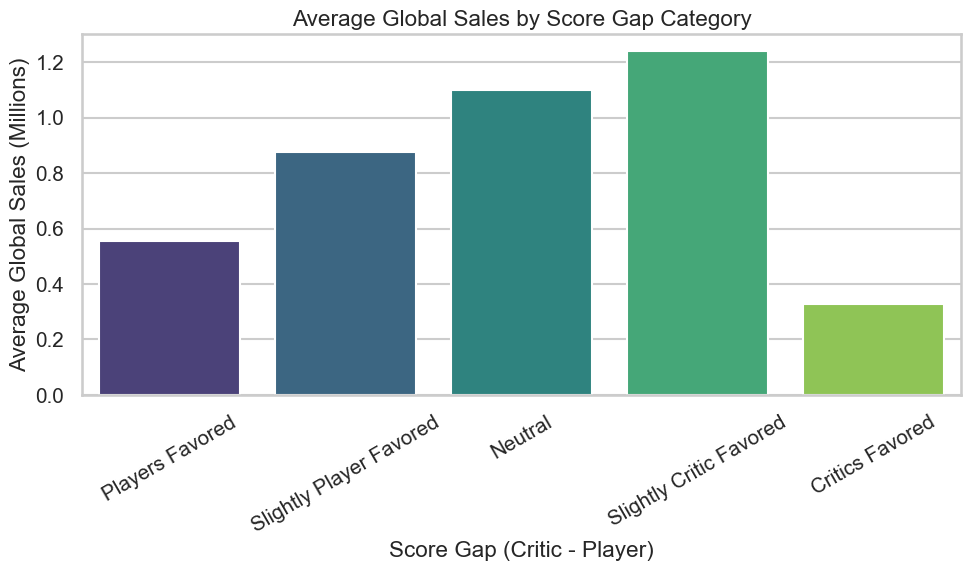

In [20]:
#sales vs score gap category
plt.figure(figsize=(10, 6))
sns.barplot(data=gap_summary, x="gap_category", y="mean", palette="viridis")
plt.title("Average Global Sales by Score Gap Category")
plt.xlabel("Score Gap (Critic - Player)")
plt.ylabel("Average Global Sales (Millions)")
plt.xticks(rotation=30)
plt.tight_layout()

Heatmap of average score gap by platform group and genre


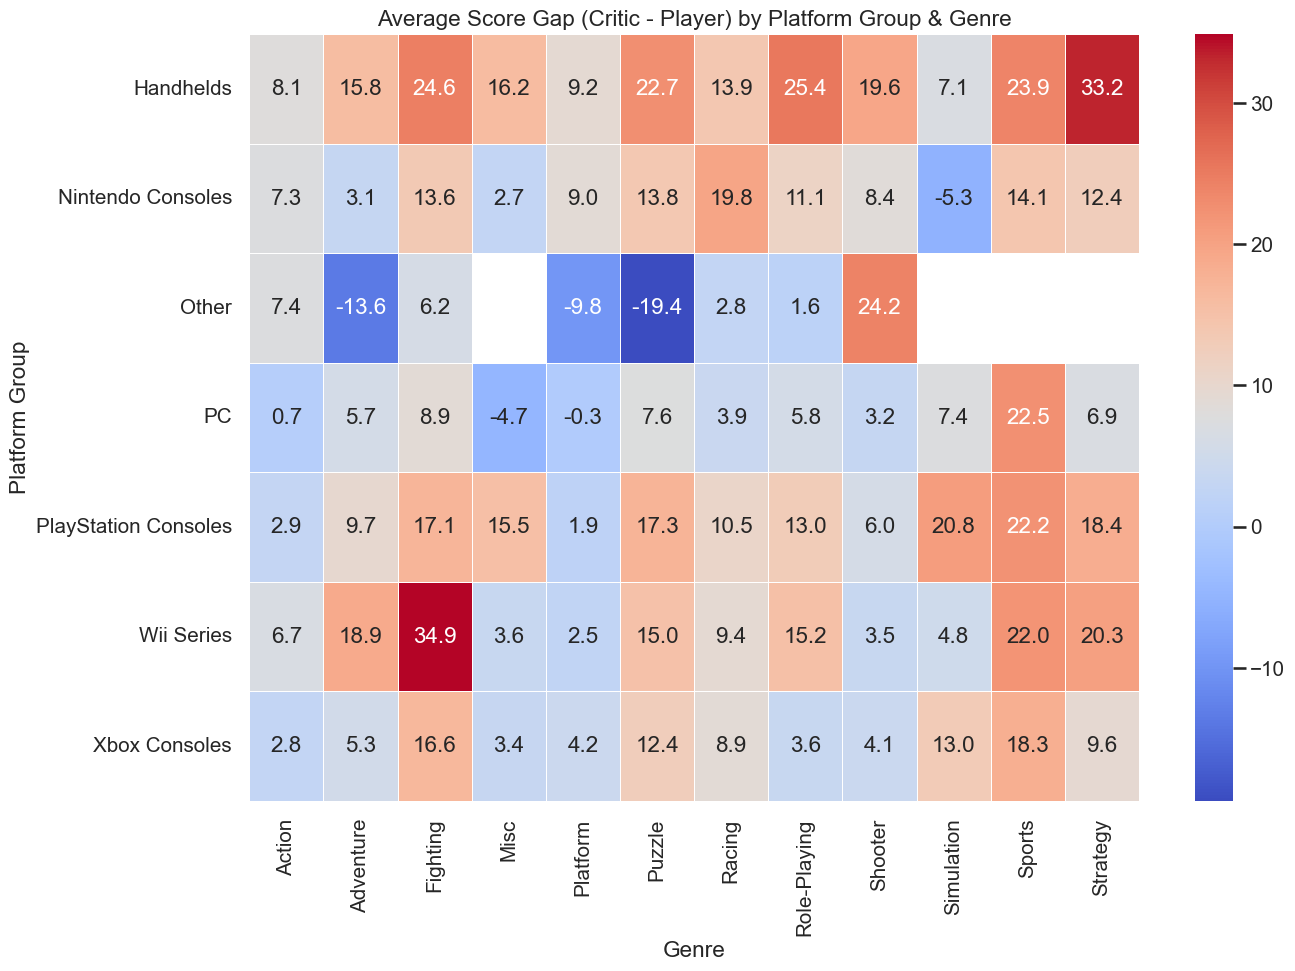

In [21]:
pivot_gap = df.pivot_table(index="Platform_Group", columns="Genre", values="score_gap", aggfunc="mean")
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_gap, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Average Score Gap (Critic - Player) by Platform Group & Genre")
plt.xlabel("Genre")
plt.ylabel("Platform Group")
plt.tight_layout()
plt.show()

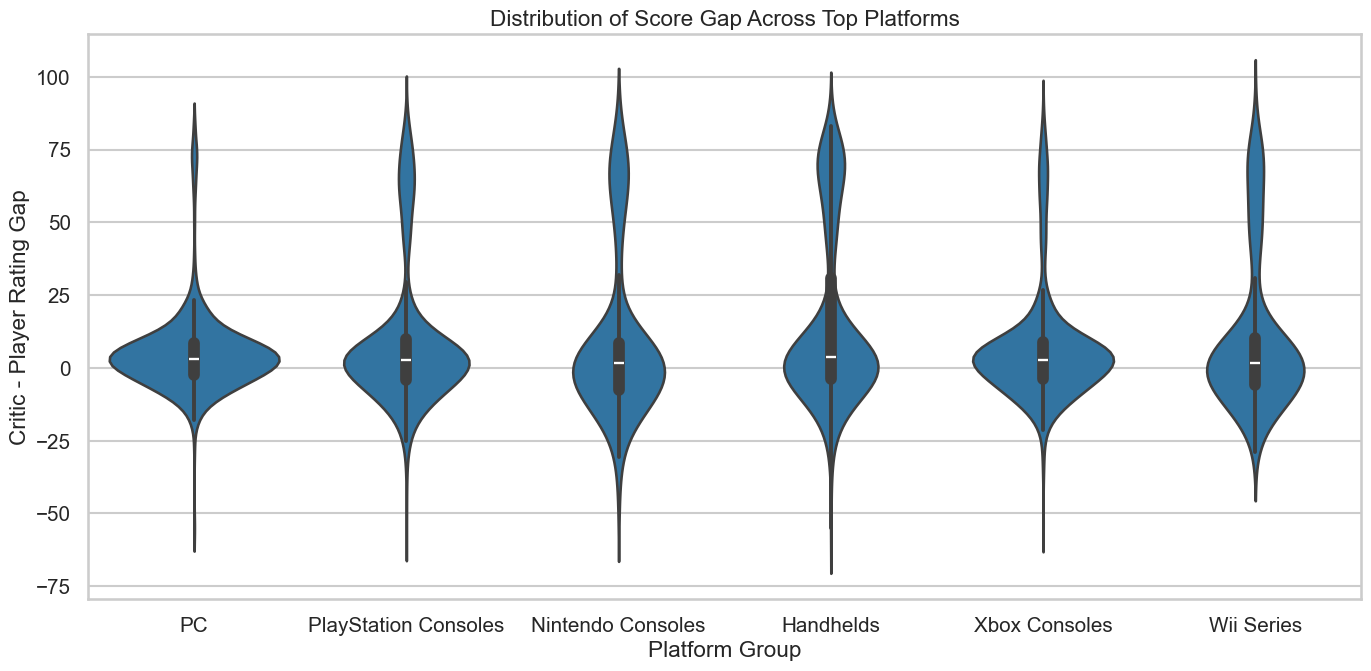

In [29]:
plt.figure(figsize=(14, 7))
top_platforms = df['Platform_Group'].value_counts().head(6).index.tolist()
sns.violinplot(data=df[df["Platform_Group"].isin(top_platforms)], x="Platform_Group", y="score_gap")
plt.title("Distribution of Score Gap Across Top Platforms")
plt.xlabel("Platform Group")
plt.ylabel("Critic - Player Rating Gap")
plt.tight_layout()
plt.show()

Regression Analysis

In [32]:
X = df[["rating", "metacritic", "score_gap"]]
y = df["Global_Sales(MM)"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)

In [38]:
# Performance metrics
lr_r2 = r2_score(y_test, y_pred_lr)
rf_r2 = r2_score(y_test, y_pred_rf)

lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Linear Regression R^2: {lr_r2:.4f}, RMSE: {lr_rmse:.4f}")
print(f"Random Forest R^2: {rf_r2:.4f}, RMSE: {rf_rmse:.4f}")

Linear Regression R^2: 0.0897, RMSE: 1.6077
Random Forest R^2: -0.3919, RMSE: 1.9880


Feature Importance from Random Forest

In [39]:
importances = rf.feature_importances_
feature_names = X.columns

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance: Predicting Sales from Ratings & Score Gap")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()